In [1]:
from sympy import symbols
from sympy.plotting import plot,plot_parametric
from pandas import DataFrame
import numpy as np

%matplotlib inline

# Parameters

* Asset 1 is a bond (low Sharpe)
* Asset 2 is equities (high Sharpe)
* Bonds and equities are negatively correlated

In [2]:
r=0.02 # Cash rate

s1=0.07 # Vol
sr1=0.05 # Sharpe
s2=0.16 # Vol
sr2=0.25 # Sharpe
rho=-0.2 # Correlation
sigma=np.array([[s1**2,rho*s1*s2],[rho*s1*s2,s2**2]]) # Covariance matrix
e=np.ones(2)

mu1=r+sr1*s1 # Expected return
mu2=r+sr2*s2 # Expected return
mu=np.array([mu1,mu2]) # Vector of expected returns

# Solving the constrained optimization program 

In [3]:
A=(np.transpose(mu)).dot(np.linalg.solve(sigma,mu))

B=(np.transpose(mu)).dot(np.linalg.solve(sigma,e))

C=(np.transpose(e)).dot(np.linalg.solve(sigma,e))

D=(np.transpose(mu-r*e)).dot(np.linalg.solve(sigma,(mu-r*e)))**0.5

E=(np.transpose(e)).dot(np.linalg.solve(sigma,(mu-r*e)))




* Minimum variance portfolio
* Tangent portfolio

In [4]:
pi1=(1/C)*np.linalg.solve(sigma,e)
volpi1=((np.transpose(pi1)).dot(sigma.dot(pi1)))**0.5

pistar=(1/E)*np.linalg.solve(sigma,mu-r*e)
volpistar=((np.transpose(pistar)).dot(sigma.dot(pistar)))**0.5

shpistar=D

rhostar=(1/volpistar)*shpistar

print "pi1",pi1
print "volpi1",volpi1

print "pistar",pistar
print "volpistar",volpistar

print "shpistar",shpistar


print "rhostar", rhostar


pi1 [ 0.79588336  0.20411664]
volpi1 0.0586737352153
pistar [ 0.46783626  0.53216374]
volpistar 0.0848939132423
shpistar 0.270030862434
rhostar 3.18080357143


# Efficient frontier with no riskless asset

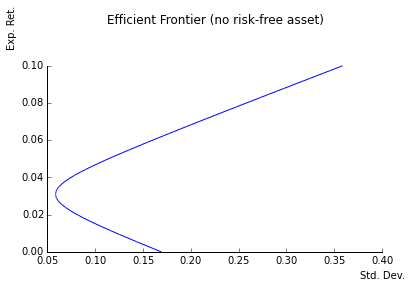

In [5]:
x=symbols('x')
expr=((A-2*B*x+C*x**2)/(A*C-B**2))**0.5

pl=plot_parametric(expr,x,(x,0.00,0.10),axis_center=(0.05,0.0),show=False)

pl.xlabel='Std. Dev.'
pl.ylabel='Exp. Ret.'
pl.title='Efficient Frontier (no risk-free asset)'
pl.show()
#pl.save('pl.png')


# Efficient frontier with a riskless asset

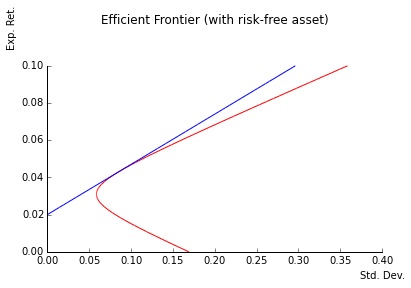

In [62]:
pl1=plot_parametric(expr,x,(x,0.00,0.10),axis_center=(0.0,0.0),show=False)
pl1.xlabel='Std. Dev.'
pl1.ylabel='Exp. Ret.'
pl1.title='Efficient Frontier (with risk-free asset)'
pl1[0].line_color='red'
pl2=plot_parametric((x-r)/D,x,(x,r,0.10),show=False)
pl1.append(pl2[0])        
pl1.show()
#pl1.save('pl1.png')

# Portfolio along the efficient frontier

In [63]:
rholr=(3.0/5)*rhostar
vollr=(rholr/rhostar)*volpistar
pilr=(rholr/rhostar)*pistar
pilr=np.append(1.0-np.sum(pilr),pilr)

rhohr=1.5*rhostar
volhr=(rhohr/rhostar)*volpistar
pihr=(rhohr/rhostar)*pistar
pihr=np.append(1.0-np.sum(pihr),pihr)

collr=np.append(vollr,pilr)
colhr=np.append(volhr,pihr)

data= [collr, colhr]
df = DataFrame(np.transpose(data), index=['Vol','Cash','Bonds', 'Equities'], columns=['Low Risk','High Risk'])
df

Low Risk  High Risk
Vol       0.050936   0.127341
Cash      0.400000  -0.500000
Bonds     0.280702   0.701754
Equities  0.319298   0.798246